In [1]:
import os
import glob

import numpy as np
import pandas as pd

import cartopy
import cartopy.feature as cf
import cartopy.crs as ccrs

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
dir_base = os.path.join('..','resources','*.csv')

In [3]:
file_list = glob.glob(dir_base)
file_list = sorted(file_list)
file_len = len(file_list)
print(f'Number of files: {file_len}')

Number of files: 12


In [4]:
file_list

['../resources/VENETO_IMERG_mean_beta_3h_cores_01.csv',
 '../resources/VENETO_IMERG_mean_beta_3h_cores_03.csv',
 '../resources/VENETO_IMERG_mean_beta_3h_cores_05.csv',
 '../resources/VENETO_IMERG_mean_beta_3h_cores_07.csv',
 '../resources/VENETO_IMERG_mean_beta_3h_cores_10.csv',
 '../resources/VENETO_IMERG_mean_beta_3h_cores_12.csv',
 '../resources/VENETO_IMERG_mean_beta_3h_cores_15.csv',
 '../resources/VENETO_IMERG_mean_beta_3h_cores_17.csv',
 '../resources/VENETO_IMERG_mean_beta_3h_cores_20.csv',
 '../resources/VENETO_IMERG_mean_beta_3h_cores_22.csv',
 '../resources/VENETO_IMERG_mean_beta_3h_cores_25.csv',
 '../resources/VENETO_IMERG_mean_beta_3h_cores_28.csv']

In [5]:
DATA = pd.read_csv(file_list[0])
DATA

,Product,Resolution_t,Cores,Time(min),memory
0,IMERG,3h,1,158.199,6.637


In [6]:
cores_list = []
time_list = []
memorry_list = []
for nn in range(file_len):
    DATA = pd.read_csv(file_list[nn])
    cores_list.append(DATA['Cores'].values)
    time_list.append(DATA['Time(min)'].values)
    memorry_list.append(DATA['memory'].values)

In [7]:
cores_levels = []
for nn in range(file_len):
    cores_levels.append(cores_list[nn][0])

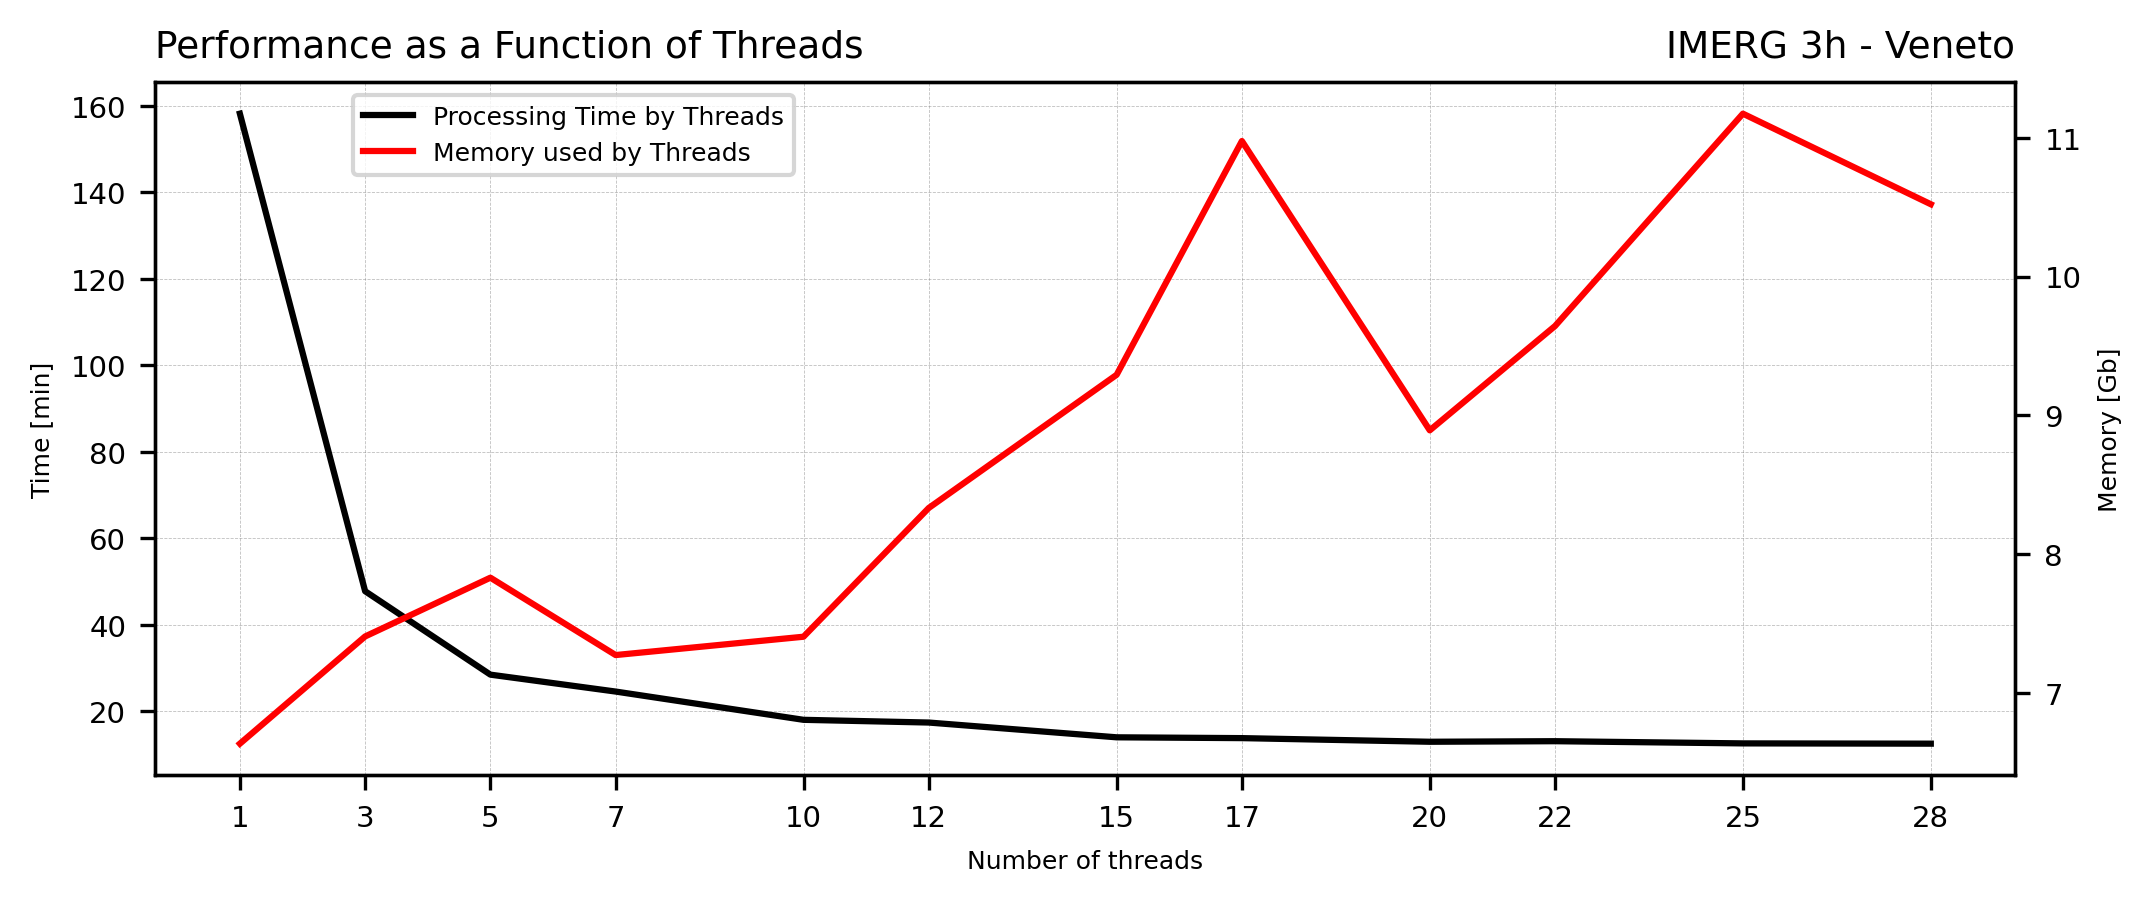

In [8]:
fig = plt.figure(figsize=(8,3),dpi=300)
gs = gridspec.GridSpec(1,1)

#========================================================================
ax1 = plt.subplot(gs[0, 0])
line1, = ax1.plot(cores_list,time_list,'-k',label='Processing Time by Threads')

ax1.tick_params(axis='both', which='major', labelsize=7)
ax1.set_ylabel('Time [min]',fontsize=6)
ax1.set_xlabel('Number of threads',fontsize=6)
ax1.set_xticks(cores_levels)

ax2 = ax1.twinx()
line2, = ax2.plot(cores_list,memorry_list,'-r',label='Memory used by Threads')

ax2.set_xticks(cores_levels)
ax2.tick_params(axis='both', which='major', labelsize=7)

ax1.set_title('Performance as a Function of Threads',fontsize=9, loc='left')
ax1.set_title('IMERG 3h - Veneto',fontsize=9, loc='right')
ax2.set_ylabel('Memory [Gb]',fontsize=6)

ax1.grid(linewidth=0.2, linestyle='--', color='gray', alpha=0.5)

lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, fontsize=6, bbox_to_anchor=(0.35, 1))

# ==============================================================================
ax1.set_facecolor('white')
fig.patch.set_alpha(0)

In [163]:
cores_pos = np.array([1, 3, 5, 7, 10, 12, 15, 17, 20, 22, 25, 28])
cores_pos1 = cores_pos + 0.3
cores_pos2 = cores_pos - 0.3
time_beta = np.array([158, 47, 28, 24, 18, 17, 13.9, 13.8, 12.9, 12.8, 12.5, 12.4])
time_gamma = np.array([440, 188, 92, 78, 72, 52.7, 50.6, 41.27, 40.1, 40, 39, 38.6])
time_T = time_beta + time_gamma

In [164]:
memorry_list = [6.6, 7.7, 7.8, 7.2, 7.4, 8.3, 9.2, 8.9, 8.8, 9.6, 11.17, 10.52]

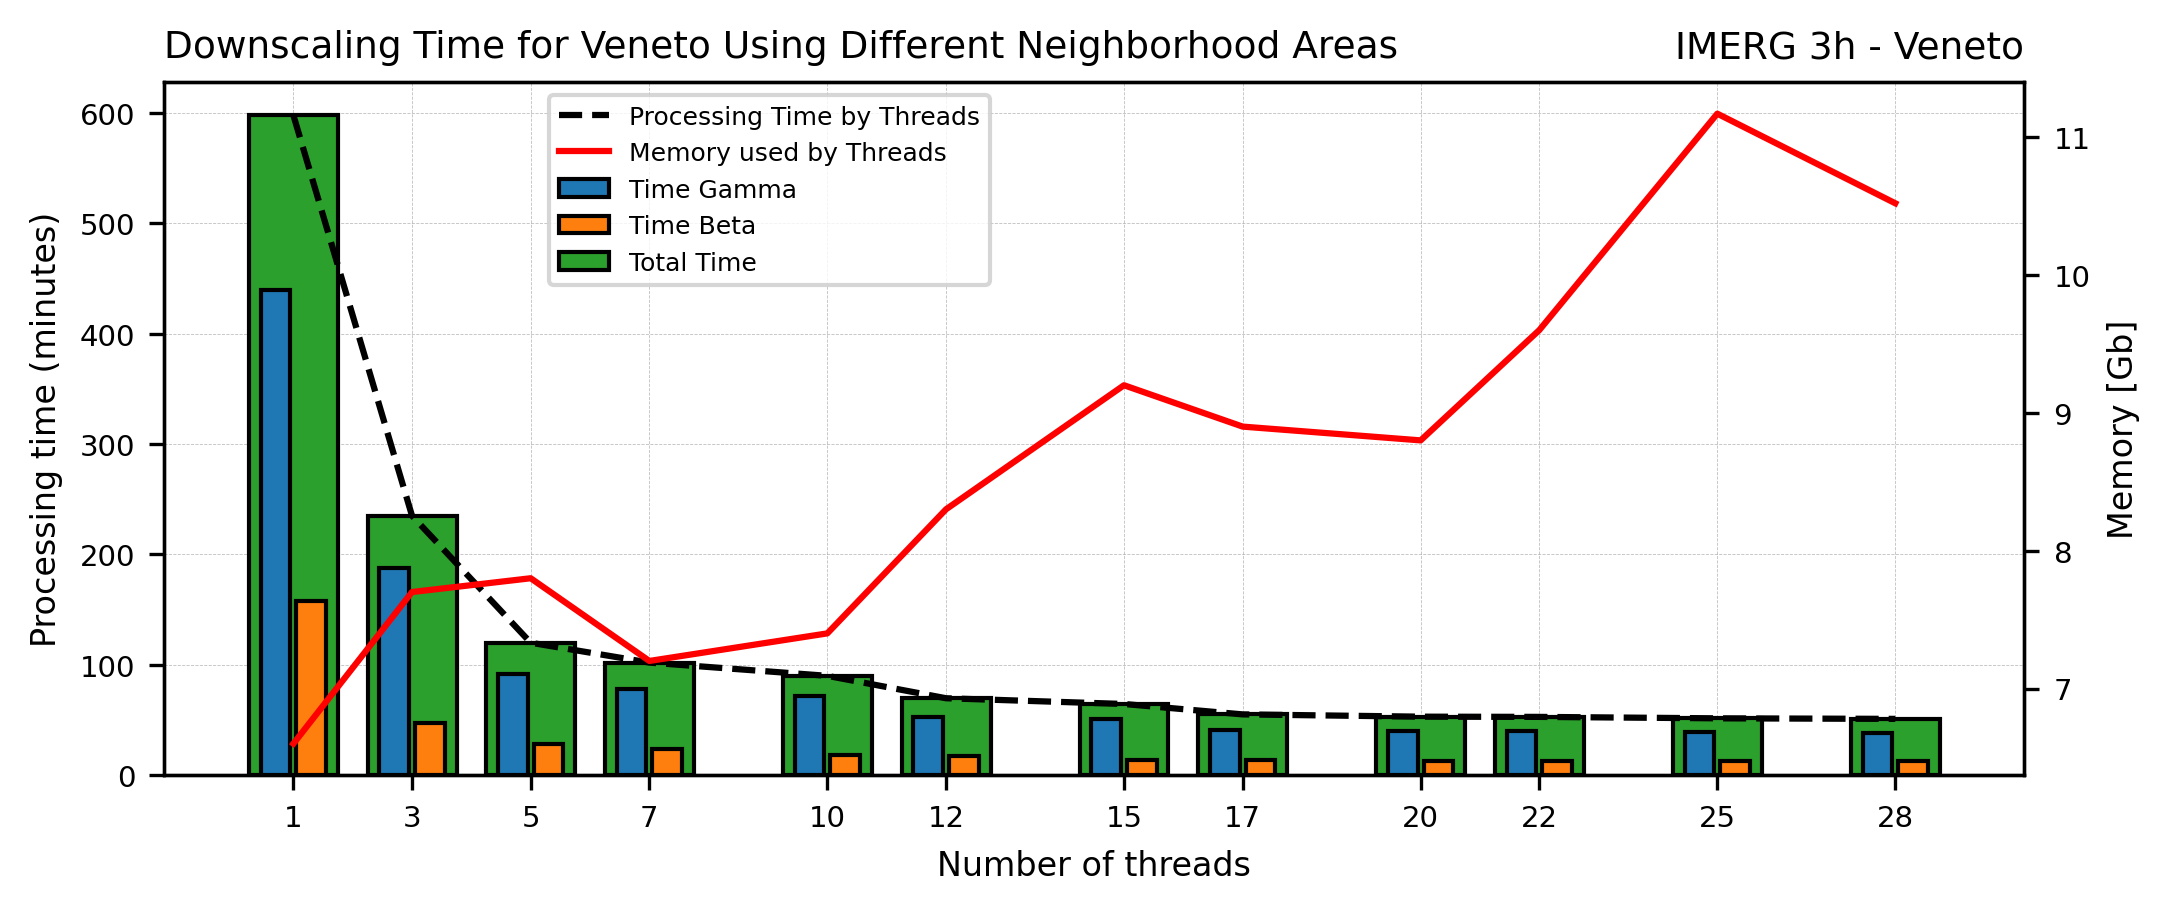

In [165]:
fig = plt.figure(figsize=(8,3),dpi=300)
gs = gridspec.GridSpec(1,1)

#========================================================================
ax1 = plt.subplot(gs[0, 0])
bar1 = ax1.bar(cores_pos2,time_gamma, width=0.5, edgecolor='k', label='Time Gamma', zorder=15)
bar2 = ax1.bar(cores_pos1,time_beta, width=0.5, edgecolor='k', label='Time Beta', zorder=15)
bar3 = ax1.bar(cores_pos,time_T, width=1.5, edgecolor='k', label='Total Time', zorder=10)
line1, = ax1.plot(cores_pos,time_T,'--k',linewidth=1.5,label='Processing Time by Threads', zorder=18)
ax1.plot([],[],'-r',label='Memory used by Threads')

ax1.tick_params(axis='both', which='major', labelsize=7)
ax1.set_ylabel('Time [min]',fontsize=6)
ax1.set_xlabel('Number of threads',fontsize=6)
ax1.set_xticks(cores_levels)

ax1.grid(linewidth=0.2, linestyle='--', color='gray', alpha=0.5)

ax2 = ax1.twinx()
line2, = ax2.plot(cores_list,memorry_list,'-r')

ax2.set_xticks(cores_levels)
ax2.tick_params(axis='both', which='major', labelsize=7)
ax2.set_ylabel('Memory [Gb]',fontsize=8)

ax1.set_xlabel(f'Number of threads', fontsize=8)
ax1.set_ylabel(f'Processing time (minutes)', fontsize=8)
ax1.set_title('Downscaling Time for Veneto Using Different Neighborhood Areas', fontsize=9, loc='left')
ax1.set_title('IMERG 3h - Veneto',fontsize=9, loc='right')

ax1.legend(fontsize=6, bbox_to_anchor=(0.2, 1))
# ax1.legend(fontsize=7)

# ==============================================================================
ax1.set_facecolor('white')
fig.patch.set_alpha(0)

## ICEA-DHC Cluster

In [9]:
dir_base = os.path.join('/','home','arturo','Documents')
BETA = pd.read_csv(os.path.join(dir_base, 'BETA_INFO.csv'))
BETA = BETA[BETA['Neighborhood']==5]
BETA = BETA.drop_duplicates(subset=['Product'], keep='first')
BETA

,Product,Parameter,Resolution_t,Neighborhood,Cores,Time(min)
1,CMORPH,BETA,3h,5,38,2.324
5,MSWEP,BETA,3h,5,38,11.313
6,IMERG,BETA,3h,5,38,11.356
7,ERA5,BETA,1dy,5,38,2.523
8,PERSIANN,BETA,1dy,5,38,2.721


In [10]:
dir_base = os.path.join('/','home','arturo','Documents')
GAMMA = pd.read_csv(os.path.join(dir_base, 'GAMMA_INFO.csv'))
GAMMA = GAMMA[GAMMA['Neighborhood']==3]
GAMMA3 = GAMMA.drop_duplicates(subset=['Product'], keep='first')
GAMMA3

,Product,Parameter,Resolution_t,Neighborhood,Cores,Time(min)
6,SM2RAIN,GAMMA,3h,3,38,10.059
11,PERSIANN,GAMMA,1dy,3,38,10.194
12,CMORPH,GAMMA,3h,3,38,12.191
14,MSWEP,GAMMA,3h,3,38,40.590
18,ERA5,GAMMA,1dy,3,20,11.532
20,IMERG,GAMMA,1dy,3,22,52.153


In [11]:
dir_base = os.path.join('/','home','arturo','Documents')
GAMMA = pd.read_csv(os.path.join(dir_base, 'GAMMA_INFO.csv'))
GAMMA = GAMMA[GAMMA['Neighborhood']==5]
GAMMA5 = GAMMA.drop_duplicates(subset=['Product'], keep='first')
GAMMA

,Product,Parameter,Resolution_t,Neighborhood,Cores,Time(min)
0,SM2RAIN,GAMMA,1dy,5,39,126.572
1,SM2RAIN,GAMMA,1dy,5,39,115.828
2,MSWEP,GAMMA,3h,5,38,127.354
3,IMERG,GAMMA,3h,5,38,123.334
4,MSWEP,GAMMA,3h,5,38,127.529
7,CMORPH,GAMMA,3h,5,38,110.320
8,PERSIANN,GAMMA,1dy,5,38,112.983
9,ERA5,GAMMA,1dy,5,38,114.124


In [12]:
dir_base = os.path.join('/','home','arturo','Documents')
GAMMA = pd.read_csv(os.path.join(dir_base, 'GAMMA_INFO.csv'))
GAMMA = GAMMA[GAMMA['Neighborhood']==7]
GAMMA7 = GAMMA.drop_duplicates(subset=['Product'], keep='first')
GAMMA7

,Product,Parameter,Resolution_t,Neighborhood,Cores,Time(min)
5,SM2RAIN,GAMMA,3h,7,38,165.457
10,PERSIANN,GAMMA,1dy,7,38,178.490
13,CMORPH,GAMMA,3h,7,38,234.801
15,MSWEP,GAMMA,3h,7,38,592.674
16,IMERG,GAMMA,3h,7,38,615.273
21,ERA5,GAMMA,1dy,7,20,352.702


In [13]:
product_list = ['IMERG', 'CMORPH', 'MSWEP', 'ERA5', 'PERSIANN', 'SM2RAIN']

/tmp/ipykernel_17838/2706202711.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend(fontsize=6, ncol=3)


Text(0.0, 1.0, 'Downscaling Time for Veneto Using Different Neighborhood Areas')

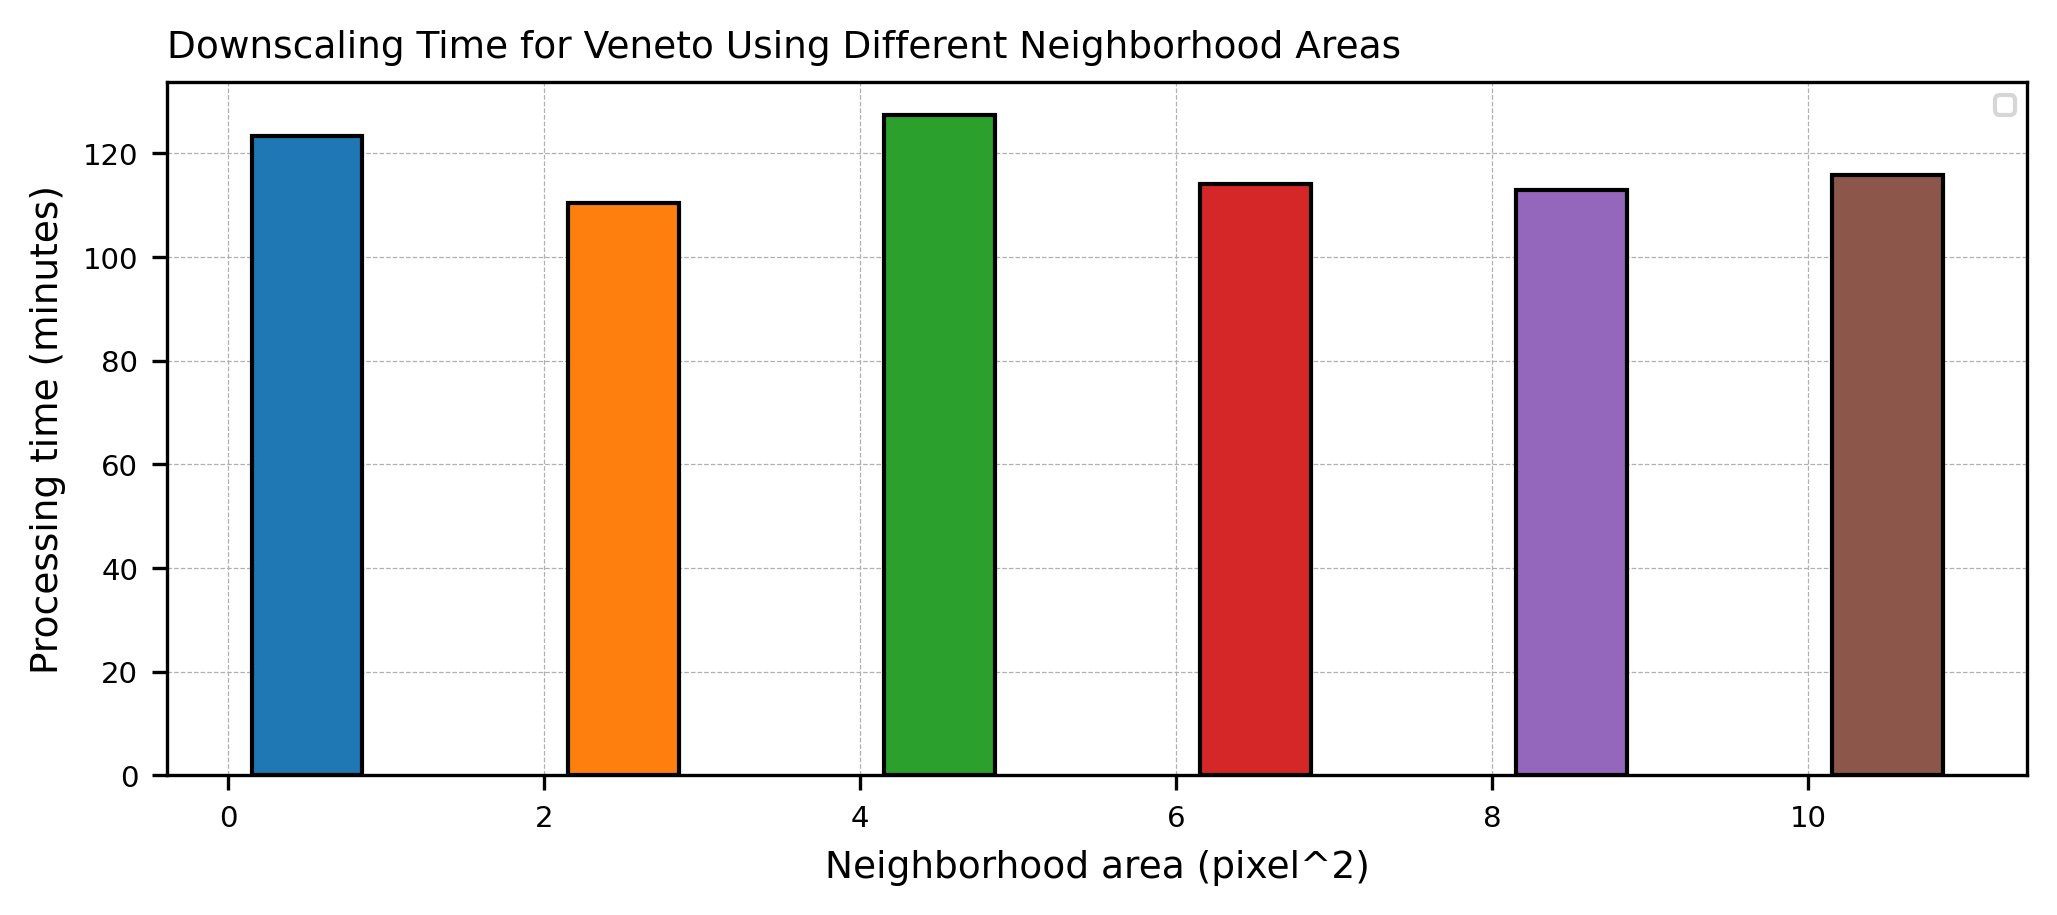

In [153]:
pos = []

fig = plt.figure(figsize=(8,3),dpi=300)
gs = gridspec.GridSpec(1,1)

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

# Diccionario para asociar productos con colores
color_dict = {product_list[nn]: colors[nn % len(colors)] for nn in range(len(product_list))}

#========================================================================
ax1 = plt.subplot(gs[0, 0])
for nn in range(len(product_list)):
    product = product_list[nn]
#     ax1.bar([2*nn],
#             GAMMA3[GAMMA3['Product']==product_list[nn]]['Time(min)']+20,
#             color=color_dict[product], width=0.6, edgecolor='k', label=f'{product_list[nn]}', zorder=10)
    ax1.bar([2*nn+0.5],
            GAMMA5[GAMMA5['Product']==product_list[nn]]['Time(min)'],
            color=color_dict[product], width=0.7, edgecolor='k', zorder=8)
#     ax1.bar([2*nn+1],
#             GAMMA7[GAMMA7['Product']==product_list[nn]]['Time(min)']+20,
#             color=color_dict[product], width=0.7, edgecolor='k', zorder=6)
    pos.append(2*nn)
    pos.append(2*nn+0.5)
    pos.append(2*nn+1)

ax1.legend(fontsize=6, ncol=3)
# ax1.set_ylim(0,650)
ax1.grid(linewidth=0.3, linestyle='--')
ax1.tick_params(axis='both', which='major', labelsize=7)
# ax1.set_xticks(pos)
# ax1.set_xticklabels(['3x3','5x5','7x7','3x3','5x5','7x7','3x3','5x5','7x7','3x3','5x5','7x7','3x3','5x5','7x7','3x3','5x5','7x7'], rotation=0)
ax1.set_xlabel(f'Neighborhood area (pixel^2)', fontsize=9)
ax1.set_ylabel(f'Processing time (minutes)', fontsize=9)
ax1.set_title('Downscaling Time for Veneto Using Different Neighborhood Areas', fontsize=9, loc='left')

0
0.5
1
2
2.5
3
4
4.5
5
6
6.5
7
8
8.5
9
10
10.5
11


[0, 0.5, 1, 2, 2.5, 3, 4, 4.5, 5, 6, 6.5, 7, 8, 8.5, 9, 10, 10.5, 11]